In [1]:
%pylab inline

from tools.issag import Sampler, _random_range_, _rejection_
from tools.issag import Models, iSSAG
import pandas as pd
import seaborn as sns
from scipy.stats import norm

from styles import slides

sns.set(style="ticks")
np.random.seed(sum(map(ord, "axis_grids")))

Populating the interactive namespace from numpy and matplotlib


In [2]:
%%time
ssag = iSSAG(size=1000)
ssag.set_all_seds(emission="both")

CPU times: user 18min 59s, sys: 1.91 s, total: 19min 1s
Wall time: 19min 12s


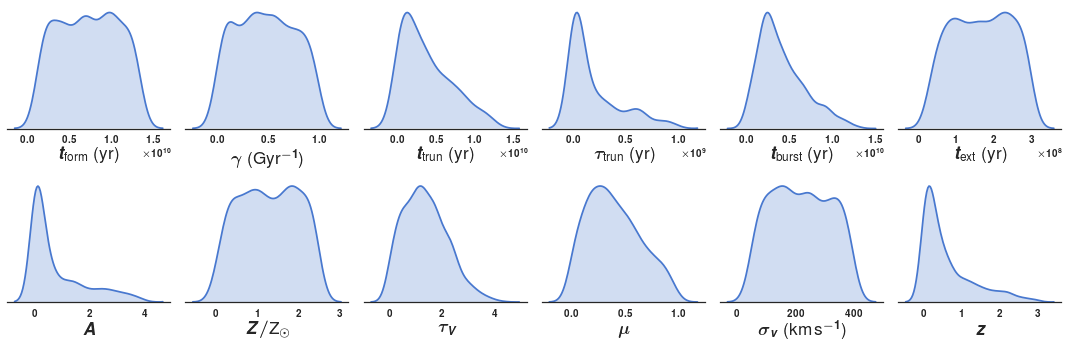

In [3]:
sns.set(style="white", palette="muted", color_codes=True)

fig, axs = subplots(2, 6, figsize=(15, 5))
axs = axs.ravel()
sns.despine(left=True)

labels = (
    r"$t_\text{form}$ (yr)",
    r"$\gamma$ (Gyr$^{-1}$)",
    r"$t_\text{trun}$ (yr)",
    r"$\tau_\text{trun}$ (yr)",
    r"$t_\text{burst}$ (yr)",
    r"$t_\text{ext}$ (yr)",
    r"$A$",
    r"$Z/\text{Z}_\odot$",
    r"$\tau_V$",
    r"$\mu$",
    r"$\sigma_v$ (km\,s$^{-1}$)",
    r"$z$"
)

cols = list(ssag.sample.columns)
cols.remove("truncated")

for i in xrange(axs.size):
    sns.distplot(ssag.sample.get(cols[i]).dropna(), hist=False, color="b", kde_kws={"shade": True},
                 axlabel=False, ax=axs[i])
    axs[i].set_xlabel(labels[i], size="x-large")

plt.setp(axs, yticks=[])
fig.tight_layout()

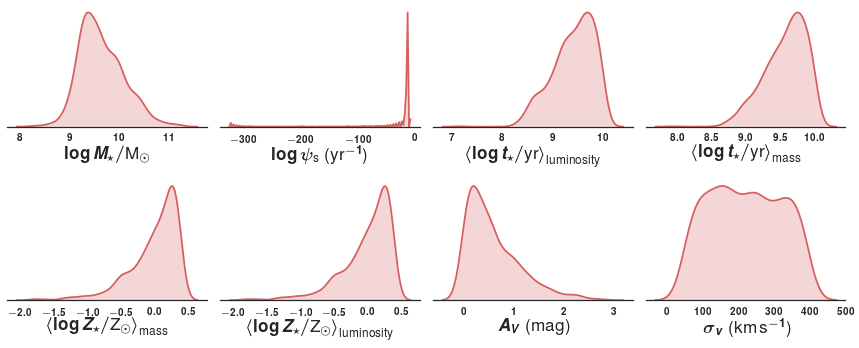

In [4]:
sns.set(style="white", palette="muted", color_codes=True)

fig, axs = subplots(2, 4, figsize=(12, 5))
axs = axs.ravel()
sns.despine(left=True)

labels = (
    r"$\log{M_\star/\text{M}_\odot}$",
    r"$\log{\psi_\text{s}}$ (yr$^{-1}$)",
    r"$\left<\log{t_\star/\text{yr}}\right>_\text{luminosity}",
    r"$\left<\log{t_\star/\text{yr}}\right>_\text{mass}$",
    r"$\left<\log{Z_\star/\text{Z}_\odot}\right>_\text{mass}$",
    r"$\left<\log{Z_\star/\text{Z}_\odot}\right>_\text{luminosity}",
    r"$A_V$ (mag)",
    r"$\sigma_v$ (km\,s$^{-1}$)"
)

for i in xrange(axs.size):
    sns.distplot(ssag.physical.iloc[:, i].dropna(), hist=False, color="r", kde_kws={"shade": True},
                 axlabel=False, ax=axs[i])
    axs[i].set_xlabel(labels[i], size="x-large")

plt.setp(axs, yticks=[])
fig.tight_layout()

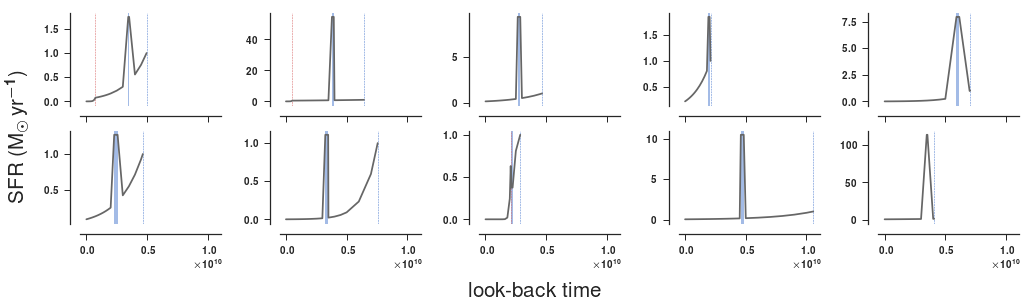

In [5]:
sns.set(style="ticks", palette="muted", color_codes=True)

fig, axs = subplots(2, 5, figsize=(14, 4), sharex=True)
axs = axs.ravel()
sns.despine(offset=10)

for i in xrange(10):
    
    axs[i].axvline(ssag.sample.t_form[i], ls="--", lw=0.5)
    axs[i].axvspan(ssag.sample.t_burst[i]-ssag.sample.t_ext[i], ssag.sample.t_burst[i], alpha=0.5, lw=0)
    axs[i].axvline(ssag.sample.t_trun[i], ls="--", lw=0.5, color="r")
    
    sfh = ssag.sfhs.get(i)
    sfh.plot(ax=axs[i], color="0.4")

fig.text(0.5, 0.0, r"look-back time", size="xx-large", ha="center", va="top")
fig.text(0.0, 0.5, r"SFR (M$_\odot$\,yr$^{-1}$)", size="xx-large", ha="right", va="center", rotation="vertical")
fig.tight_layout()

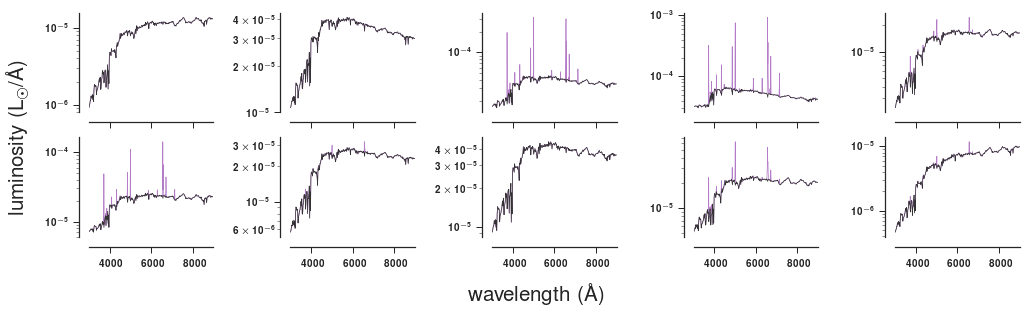

In [6]:
sns.set(style="ticks", palette="muted", color_codes=True)

fig, axs = subplots(2, 5, figsize=(14, 4), sharex=True)
xlim(3000, 9000)
axs = axs.ravel()
sns.despine(offset=10)

mask = (3000<=ssag.models.wavelength)&(ssag.models.wavelength<=9000)
for i in xrange(10):
    ssag.seds_nebular[i][mask].plot(ax=axs[i], lw=0.7, color="m", logy=True)
    ssag.seds_stellar[i][mask].plot(ax=axs[i], lw=0.7, color="0.2", logy=True)

fig.text(0.5, 0.0, r"wavelength (\AA)", size="xx-large", ha="center", va="top")
fig.text(0.0, 0.5, r"luminosity (L$_\odot$/\AA)", size="xx-large", ha="right", va="center", rotation="vertical")
fig.tight_layout()